# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker_gaussian_process import plot_maker_3d

## 2. Importing Data

In [2]:
# get all the data
X_hypo_a = pd.read_csv('../data-7cam-20/data-hypo/red_ball_coordinates_128px_2024-03-13_10h56m.csv', decimal='.', delimiter=',')
X_hypo_b = pd.read_csv('../data-7cam-20/data-hypo/red_ball_coordinates_128px_2024-03-13_11h54m.csv', decimal='.', delimiter=',')
X_hypo_c = pd.read_csv('../data-7cam-20/data-hypo/red_ball_coordinates_128px_2024-03-13_11h55m.csv', decimal='.', delimiter=',')
X_butterfly_a = pd.read_csv('../data-7cam-20/data-butterfly/red_ball_coordinates_128px_2024-03-13_12h00m.csv', decimal='.', delimiter=',')
X_butterfly_b = pd.read_csv('../data-7cam-20/data-butterfly/red_ball_coordinates_128px_2024-03-13_12h01m.csv', decimal='.', delimiter=',')
X_butterfly_c = pd.read_csv('../data-7cam-20/data-butterfly/red_ball_coordinates_128px_2024-03-13_12h02m.csv', decimal='.', delimiter=',')
X_spiro_a = pd.read_csv('../data-7cam-20/data-spiro/red_ball_coordinates_128px_2024-03-13_12h04m.csv', decimal='.', delimiter=',')
X_spiro_b = pd.read_csv('../data-7cam-20/data-spiro/red_ball_coordinates_128px_2024-03-13_12h05m.csv', decimal='.', delimiter=',')
X_spiro_c = pd.read_csv('../data-7cam-20/data-spiro/red_ball_coordinates_128px_2024-03-13_12h06m.csv', decimal='.', delimiter=',')

In [3]:
# get all the position
y_hypo_a = pd.read_csv('../data-7cam-20/data-hypo/positions_xyz_2024-03-13_10h56m.csv', decimal='.', delimiter=',').iloc[4:]
y_hypo_b = pd.read_csv('../data-7cam-20/data-hypo/positions_xyz_2024-03-13_11h54m.csv', decimal='.', delimiter=',').iloc[4:]
y_hypo_c = pd.read_csv('../data-7cam-20/data-hypo/positions_xyz_2024-03-13_11h55m.csv', decimal='.', delimiter=',').iloc[4:]
y_butterfly_a = pd.read_csv('../data-7cam-20/data-butterfly/positions_xyz_2024-03-13_12h00m.csv', decimal='.', delimiter=',').iloc[4:]
y_butterfly_b = pd.read_csv('../data-7cam-20/data-butterfly/positions_xyz_2024-03-13_12h01m.csv', decimal='.', delimiter=',').iloc[4:]
y_butterfly_c = pd.read_csv('../data-7cam-20/data-butterfly/positions_xyz_2024-03-13_12h02m.csv', decimal='.', delimiter=',').iloc[4:]
y_spiro_a = pd.read_csv('../data-7cam-20/data-spiro/positions_xyz_2024-03-13_12h04m.csv', decimal='.', delimiter=',').iloc[4:]
y_spiro_b = pd.read_csv('../data-7cam-20/data-spiro/positions_xyz_2024-03-13_12h05m.csv', decimal='.', delimiter=',').iloc[4:]
y_spiro_c = pd.read_csv('../data-7cam-20/data-spiro/positions_xyz_2024-03-13_12h06m.csv', decimal='.', delimiter=',').iloc[4:]

#### 2.1 Check for Missing Values in spriral_down_b and spiral_down_c

In [4]:
print(f'The amount of NaN values in X_butterfly_a: {X_butterfly_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_b: {X_butterfly_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_c: {X_butterfly_c.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_a: {X_spiro_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_b: {X_spiro_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_c: {X_spiro_c.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_a: {X_hypo_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_b: {X_hypo_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_c: {X_hypo_c.isna().sum().sum()}')

The amount of NaN values in X_butterfly_a: 5592
The amount of NaN values in X_butterfly_b: 6444
The amount of NaN values in X_butterfly_c: 5762
The amount of NaN values in X_spiro_a: 5486
The amount of NaN values in X_spiro_b: 6294
The amount of NaN values in X_spiro_c: 5282
The amount of NaN values in X_hypo_a: 4904
The amount of NaN values in X_hypo_b: 5468
The amount of NaN values in X_hypo_c: 5234


In [5]:
# remove all the rows where more than 3 cols have a NaN value in all X (has 14 cols)
combined_hypo_a = pd.concat([X_hypo_a, y_hypo_a], axis=1)
combined_hypo_b = pd.concat([X_hypo_b, y_hypo_b], axis=1)
combined_hypo_c = pd.concat([X_hypo_c, y_hypo_c], axis=1)
combined_butterfly_a = pd.concat([X_butterfly_a, y_butterfly_a], axis=1)
combined_butterfly_b = pd.concat([X_butterfly_b, y_butterfly_b], axis=1)
combined_butterfly_c = pd.concat([X_butterfly_c, y_butterfly_c], axis=1)
combined_spiro_a = pd.concat([X_spiro_a, y_spiro_a], axis=1)
combined_spiro_b = pd.concat([X_spiro_b, y_spiro_b], axis=1)
combined_spiro_c = pd.concat([X_spiro_c, y_spiro_c], axis=1)

In [6]:
combined_hypo_a.dropna(thresh=13, inplace=True)
combined_hypo_b.dropna(thresh=13, inplace=True)
combined_hypo_c.dropna(thresh=13, inplace=True)
combined_butterfly_a.dropna(thresh=13, inplace=True)
combined_butterfly_b.dropna(thresh=13, inplace=True)
combined_butterfly_c.dropna(thresh=13, inplace=True)
combined_spiro_a.dropna(thresh=13, inplace=True)
combined_spiro_b.dropna(thresh=13, inplace=True)
combined_spiro_c.dropna(thresh=13, inplace=True)
combined_hypo_a.shape, combined_hypo_b.shape, combined_hypo_c.shape, combined_butterfly_a.shape, combined_butterfly_b.shape, combined_butterfly_c.shape, combined_spiro_a.shape, combined_spiro_b.shape, combined_spiro_c.shape

((629, 17),
 (467, 17),
 (539, 17),
 (423, 17),
 (330, 17),
 (373, 17),
 (454, 17),
 (283, 17),
 (576, 17))

In [7]:
def splitup(combined_df):
    X_df = combined_df.iloc[:, :14]
    y_df = combined_df.iloc[:, 14:]
    return X_df, y_df

X_hypo_a, y_hypo_a = splitup(combined_hypo_a)
X_hypo_b, y_hypo_b = splitup(combined_hypo_b)
X_hypo_c, y_hypo_c = splitup(combined_hypo_c)
X_butterfly_a, y_butterfly_a = splitup(combined_butterfly_a)
X_butterfly_b, y_butterfly_b = splitup(combined_butterfly_b)
X_butterfly_c, y_butterfly_c = splitup(combined_butterfly_c)
X_spiro_a, y_spiro_a = splitup(combined_spiro_a)
X_spiro_b, y_spiro_b = splitup(combined_spiro_b)
X_spiro_c, y_spiro_c = splitup(combined_spiro_c)

In [8]:
X_butterfly_a.shape, X_butterfly_b.shape, X_butterfly_c.shape, X_spiro_a.shape, X_spiro_b.shape, X_spiro_c.shape, X_hypo_a.shape, X_hypo_b.shape, X_hypo_c.shape

((423, 14),
 (330, 14),
 (373, 14),
 (454, 14),
 (283, 14),
 (576, 14),
 (629, 14),
 (467, 14),
 (539, 14))

In [9]:
from utils.interpolation import interpolate_dataframe

X_hypo_a_int = interpolate_dataframe(X_hypo_a)
X_hypo_b_int = interpolate_dataframe(X_hypo_b)
X_hypo_c_int = interpolate_dataframe(X_hypo_c)
X_butterfly_a_int = interpolate_dataframe(X_butterfly_a)
X_butterfly_b_int = interpolate_dataframe(X_butterfly_b)
X_butterfly_c_int = interpolate_dataframe(X_butterfly_c)
X_spiro_a_int = interpolate_dataframe(X_spiro_a)
X_spiro_b_int = interpolate_dataframe(X_spiro_b)
X_spiro_c_int = interpolate_dataframe(X_spiro_c)

In [10]:
print(f'The amount of NaN values in X_butterfly_a: {X_butterfly_a_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_b: {X_butterfly_b_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_c: {X_butterfly_c_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_a: {X_spiro_a_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_b: {X_spiro_b_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_c: {X_spiro_c_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_a: {X_hypo_a_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_b: {X_hypo_b_int.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_c: {X_hypo_c_int.isna().sum().sum()}')

The amount of NaN values in X_butterfly_a: 0
The amount of NaN values in X_butterfly_b: 0
The amount of NaN values in X_butterfly_c: 0
The amount of NaN values in X_spiro_a: 0
The amount of NaN values in X_spiro_b: 0
The amount of NaN values in X_spiro_c: 0
The amount of NaN values in X_hypo_a: 0
The amount of NaN values in X_hypo_b: 0
The amount of NaN values in X_hypo_c: 0


In [11]:
X_butterfly_a_int.shape, X_butterfly_b_int.shape, X_butterfly_c_int.shape, X_spiro_a_int.shape, X_spiro_b_int.shape, X_spiro_c_int.shape, X_hypo_a_int.shape, X_hypo_b_int.shape, X_hypo_c_int.shape

((423, 14),
 (330, 14),
 (373, 14),
 (454, 14),
 (283, 14),
 (576, 14),
 (629, 14),
 (467, 14),
 (539, 14))

I Interpolated the files with a lot of missing values
All the results are quite good except butterfly_b 

### 2.3 Combine all the datasets

In [12]:
X_interpolated = pd.concat([X_hypo_a_int, X_hypo_b_int, X_hypo_c_int, X_butterfly_a_int, X_butterfly_b_int, X_butterfly_c_int, X_spiro_a_int, X_spiro_b_int, X_spiro_c_int])
y_train = pd.concat([y_hypo_a, y_hypo_b, y_hypo_c, y_butterfly_a, y_butterfly_b, y_butterfly_c, y_spiro_a, y_spiro_b, y_spiro_c])
X_interpolated.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [13]:
X_interpolated.shape, y_train.shape

((4074, 14), (4074, 3))

In [14]:
combined = pd.concat([X_interpolated, y_train], axis=1)

## 3. Data Preprocessing

In [15]:
X = combined.iloc[:, :14]
y = combined.iloc[:, 14:]
X.to_csv('../data-7cam-20/all/red_ball_all_int_20deg.csv', index=False)
y.to_csv('../data-7cam-20/all/positions_all_int_20deg.csv', index=False)

In [16]:
X.shape, y.shape

((4074, 14), (4074, 3))

In [17]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [18]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [19]:
param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50)  ,(100,), (64, 32, 64)],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

#random_search.fit(X_scaled, y_scaled)

In [20]:
#print(f'Best parameters: {random_search.best_params_}')
#print(f'Best score: {random_search.best_score_}')

In [21]:
#model = random_search.best_estimator_

## 5. Training the Model

In [22]:
model = MLPRegressor(solver='adam', max_iter=20000, learning_rate_init=0.001, learning_rate='adaptive', hidden_layer_sizes=(50,100,50), early_stopping=True, alpha=0.01, activation='tanh')

In [23]:
model.fit(X_scaled, y_scaled)

MLPRegressor(activation='tanh', alpha=0.01, early_stopping=True,
             hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
             max_iter=20000)

## 6. Make Predictions On Test Data

In [24]:
import pandas as pd

In [25]:
X_test_lis = pd.read_csv('../data-7cam-20/data-lis/red_ball_coordinates_128px_2024-03-13_12h08m.csv', decimal='.', delimiter=',')
y_test_lis = pd.read_csv('../data-7cam-20/data-lis/positions_xyz_2024-03-13_12h08m.csv', decimal='.', delimiter=',').iloc[4:]

In [36]:
combined_test_lis = pd.concat([X_test_lis, y_test_lis], axis=1)
combined_test_lis.dropna(thresh=13, inplace=True)
combined_test_lis_int = interpolate_dataframe(combined_test_lis)
X_test_lis, y_test_lis = splitup(combined_test_lis_int)
X_test_lis.shape, y_test_lis.shape

((247, 14), (247, 3))

In [27]:
X_test_8 = pd.read_csv('../data-7cam-20/data-8motion/red_ball_coordinates_128px_2024-03-13_12h58m.csv', decimal='.', delimiter=',')
y_test_8 = pd.read_csv('../data-7cam-20/data-8motion/positions_xyz_2024-03-13_12h58m.csv', decimal='.', delimiter=',').iloc[4:]
X_test_8.shape, y_test_8.shape

((563, 14), (563, 3))

In [35]:
combined_test_8 = pd.concat([X_test_8, y_test_8], axis=1)
combined_test_8.dropna(thresh=13, inplace=True)
combined_test_8_int = interpolate_dataframe(combined_test_8)
X_test_8, y_test_8 = splitup(combined_test_8_int)
X_test_8.shape, y_test_8.shape

In [29]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :14]
    y_val = combined_test.iloc[:, 14:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [30]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

In [31]:
X_test_lis_scaled, y_test_lis = prepare_and_scale_test_data(X_test_lis, y_test_lis, scaler_x)

Mean Squared Error on Test Data Set: 0.7429328505788013
Mean Absolute Error on Test Data Set: 0.5920899769629584
R2 Score on Test Data set: 0.6297274205832941


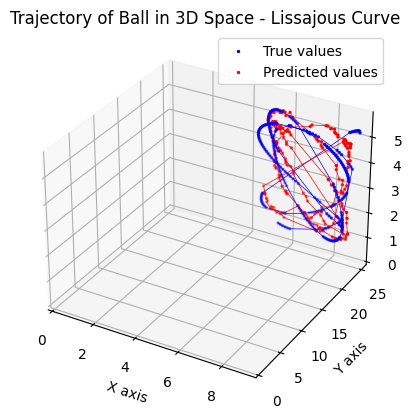

In [32]:
y_test_pred_lis, mse_lis, mae_lis, r2_lis = predict_evaluate_plot(X_test_lis_scaled, y_test_lis, model, scaler_y, title='Trajectory of Ball in 3D Space - Lissajous Curve')

In [33]:
X_test_8_scaled, y_test_8 = prepare_and_scale_test_data(X_test_8, y_test_8, scaler_x)

Mean Squared Error on Test Data Set: 0.8190400768609968
Mean Absolute Error on Test Data Set: 0.6045242642148203
R2 Score on Test Data set: 0.3117159365768429


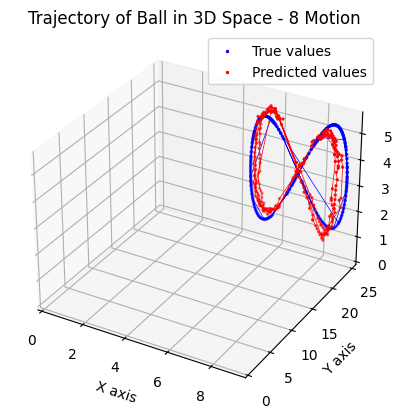

In [34]:
y_test_pred_8, mse_8, mae_8, r2_8 = predict_evaluate_plot(X_test_8_scaled, y_test_8, model, scaler_y, title='Trajectory of Ball in 3D Space - 8 Motion')